In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [104]:
titanic_train = pd.read_csv('train.csv')    #loading titanic data from train file
titanic_train.head(500)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C
497,498,0,3,"Shellard, Mr. Frederick William",male,NaN,0,0,C.A. 6212,15.1000,NaN,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S


In [105]:
coll = titanic_train.columns     #it tells all the features/columns
print(coll)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [106]:
print("Shape of titanic data set {}: ".format(titanic_train.shape))

Shape of titanic data set (891, 12): 


In [107]:
print(titanic_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [108]:
[print(columns,np.unique(titanic_train[columns].isnull())) for columns in coll]#this tells the unique values having null / nan columns

PassengerId [False]
Survived [False]
Pclass [False]
Name [False]
Sex [False]
Age [False  True]
SibSp [False]
Parch [False]
Ticket [False]
Fare [False]
Cabin [False  True]
Embarked [False  True]


[None, None, None, None, None, None, None, None, None, None, None, None]

In [109]:
list((columns,np.unique(titanic_train[columns].astype(str).size)) for columns in coll)  #tells total unique values in column

[('PassengerId', array([891])),
 ('Survived', array([891])),
 ('Pclass', array([891])),
 ('Name', array([891])),
 ('Sex', array([891])),
 ('Age', array([891])),
 ('SibSp', array([891])),
 ('Parch', array([891])),
 ('Ticket', array([891])),
 ('Fare', array([891])),
 ('Cabin', array([891])),
 ('Embarked', array([891]))]

In [110]:
#survival based on gender

In [111]:
print("total females:",len (titanic_train[(titanic_train['Sex']== 'female')].index))
print("total females:",len (titanic_train[(titanic_train['Sex']== 'male')].index))

total females: 314
total females: 577


In [112]:
#this tells how many males survived??
survived_m=titanic_train[((titanic_train['Sex']=='male') & (titanic_train['Survived']==1))]
len(survived_m.index)

109

In [113]:
#this tells how many females survived?
survived_f=titanic_train[((titanic_train['Sex']=='female') & (titanic_train['Survived']==1))]
len(survived_f.index)

233

In [114]:
print([titanic_train.groupby("Sex")["Survived"].value_counts(normalize= True)])  #percentages of male and females survived

[Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64]


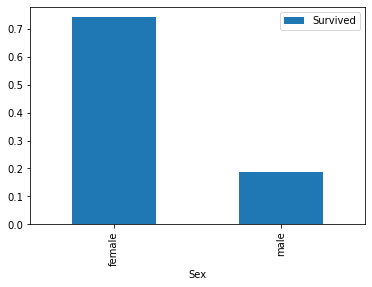

In [115]:
class_pivot = titanic_train.pivot_table(index = "Sex",values = "Survived")
class_pivot.plot.bar()
plt.show()

In [116]:
# Survial based on pessenger class

In [117]:
print(" PCLASS_1 : ", len(titanic_train[(titanic_train["Pclass"]==1)].index))
print(" PCLASS_2 : ", len(titanic_train[(titanic_train["Pclass"]==2)].index))
print(" PCLASS_3 : ", len(titanic_train[(titanic_train["Pclass"]==3)].index))


 PCLASS_1 :  216
 PCLASS_2 :  184
 PCLASS_3 :  491


In [118]:
survived_class= [titanic_train.groupby("Pclass")["Survived"].sum()]   #which class survived and how much numbers 

In [119]:
print(survived_class)

[Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64]


In [120]:
print(titanic_train.groupby("Pclass")["Survived"].value_counts(normalize= True))   #tells percentages of survived persons 

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64


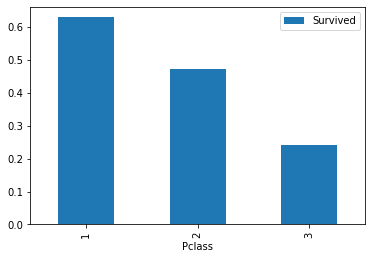

In [121]:
class_pivot = titanic_train.pivot_table(index="Pclass",values="Survived")
class_pivot.plot.bar()
plt.show()

In [122]:
#now we find corelation of Pessenger class with other 

In [123]:
correlation_matrix=titanic_train.corr(method="pearson")
correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [124]:
#fare and Pclass and direct relation,mor3e survival chances of upper classes

In [125]:
#now looking at the age factor in survival

In [126]:
survived = titanic_train[titanic_train ["Survived"]==1]
died = titanic_train[titanic_train ["Survived"]==0]

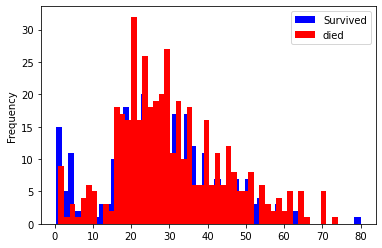

In [127]:
survived["Age"].plot.hist(color='blue',bins=50)
died["Age"].plot.hist(color='red',bins=50)
plt.legend(["Survived","died"])
plt.show()

In [128]:
#age columns have missing values,now we fill that

In [129]:
titanic_copy= titanic_train
titanic_copy["Age"]=titanic_copy["Age"].fillna(titanic_copy["Age"].mean(),inplace= False)

In [130]:
titanic_copy.shape

(891, 12)

In [131]:
#embarked and cabin are non integer values, we cant fill them

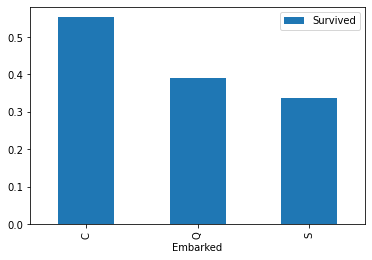

In [132]:
class_pivot=titanic_copy.pivot_table(index="Embarked",values="Survived")
class_pivot.plot.bar()
plt.show()

In [133]:
#so we came to know that pessenger class,gender,age and emarkment points are important features

In [134]:
titanic_copy=titanic_copy.dropna(subset=["Sex","Pclass","Embarked","Age"])    #now removing embarked where NAN 

In [135]:
titanic_copy.shape

(889, 12)

In [136]:
Y_titanic = titanic_copy.loc[:,"Survived"]
X_titanic = titanic_copy.loc[:,["Age","Sex","Pclass","Embarked"]]


In [137]:
#now we normalise the data for better efficency
#converting embarked into 3 seperate classes


In [138]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
age=scaler.fit_transform(X_titanic["Age"].values.reshape(-1,1))  
X_titanic["Age"]=age

In [139]:
X_titanic_he=pd.get_dummies(X_titanic,columns=["Pclass","Sex","Embarked"])
X_titanic_he.head()

,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-0.590495,0,0,1,0,1,0,0,1
1,0.643971,1,0,0,1,0,1,0,0
2,-0.281878,0,0,1,1,0,0,0,1
3,0.412509,1,0,0,1,0,0,0,1
4,0.412509,0,0,1,0,1,0,0,1


In [140]:
#now dividing data for training and put in algorithm


In [141]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_titanic_he,Y_titanic,test_size=0.2,random_state=0)
#0.2 means 20 percent data is testing and 80 % is training

In [142]:
#training data using Decision Tree algo


In [143]:
from sklearn.preprocessing import StandardScaler   #Converting in STANDARD fORM
Sc=StandardScaler()
X_train=Sc.fit_transform(X_train)
X_test=Sc.fit_transform(X_test)


In [144]:
def models(X_train,Y_train):  #Decision Tree Training accuracy
    #using decision tree algo
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(X_train,Y_train)
    
    print("Decision Tree training accuracy: ",tree.score(X_train,Y_train))
    return tree

#printing accuracy


In [145]:
tree_model=models(X_train,Y_train)  #calculating decision Tree Training Accuracy

Decision Tree training accuracy:  0.9113924050632911


In [146]:
#testing accuracyy  calculating
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(Y_test,tree_model.predict(X_test))
TN,FP,FN,TP=confusion_matrix(Y_test,tree_model.predict(X_test)).ravel()
test_score=(TP+TN)/(TP+TN+FN+FP)
print(cm)
print('"Decision Tree Testing Accuracy : ',test_score)

[[82 23]
 [29 44]]
"Decision Tree Testing Accuracy :  0.7078651685393258
